# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bustanul Khair Rahman
- **Email:** bustanuldarking23@gmail.com
- **ID Dicoding:** bustanul_khair

## Menentukan Pertanyaan Bisnis

- Apakah ada tren peningkatan atau penurunan penggunaan sepeda perbulannya dari 2011 dan 2012?
- Bagaimana dampak hari libur terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Load `day_dataset`

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load `hour_dataset`

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- load dataset dari directory local menggunakan library pandas

### Assessing Data

#### Menilai tabel `day_df`

In [4]:
day_df.info()
day_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
day_df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [6]:
day_df[day_df.hum == day_df.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- kesalahan data type pada kolom dteday
- inaccurate value pada humdity yang bernilai 0, setelah di cek tidak masuk akal karna weathersit nya 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
- mengubah value dari kolom kolom yang menggunakan kode tertentu seperti season, weekday dll

#### Menilai tabel `hour_df`

In [8]:
hour_df.info()
hour_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
hour_df[hour_df.windspeed == hour_df.windspeed.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.00,0.0,5,43,48
17320,17321,2012-12-29,1,1,12,13,0,6,0,3,0.20,0.2424,1.00,0.0,13,71,84
17322,17323,2012-12-29,1,1,12,15,0,6,0,2,0.24,0.2424,0.87,0.0,19,110,129
17330,17331,2012-12-29,1,1,12,23,0,6,0,2,0.26,0.2424,0.60,0.0,0,32,32


In [11]:
hour_df.groupby('weathersit')['windspeed'].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,11413.0,0.190553,0.123788,0.0000,0.1045,0.1940,0.2537,0.8060
2,4544.0,0.179973,0.114463,0.0000,0.1045,0.1642,0.2537,0.7164
3,1419.0,0.218825,0.130198,0.0000,0.1343,0.1940,0.2985,0.8507
4,3.0,0.204000,0.119714,0.0896,0.1418,0.1940,0.2612,0.3284


In [12]:
hour_df.groupby('weathersit')['hum'].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,11413.0,0.573747,0.178463,0.08,0.43,0.56,0.710,1.00
2,4544.0,0.698807,0.172478,0.00,0.56,0.71,0.840,1.00
3,1419.0,0.827632,0.157370,0.00,0.78,0.87,0.930,1.00
4,3.0,0.883333,0.040415,0.86,0.86,0.86,0.895,0.93


In [13]:
hour_df[hour_df.hum == hour_df.hum.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


**Insight:**
- kesalahan data type pada kolom dteday
- missing value pada humdity, windspeed, atemp yang bernilai 0
- mengubah value dari kolom kolom yang menggunakan kode tertentu seperti season, weekday dll

### Cleaning Data

#### Membersihkan tabel `day_df`

In [14]:
# Ubah kode menjadi label kategori
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear', 
    2: 'Misty/Cloudy', 
    3: 'Light Snow/Rain', 
    4: 'Heavy Rain/Snow'
})

day_df['yr'] = day_df['yr'].map({0: '2011', 1: '2012'})

In [15]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
578,579,2012-08-01,Fall,2012,8,0,3,1,Clear,0.717500,0.667308,0.677500,0.141179,1074,6506,7580
429,430,2012-03-05,Spring,2012,3,0,1,1,Clear,0.243333,0.241171,0.506250,0.228858,203,3130,3333
20,21,2011-01-21,Spring,2011,1,0,5,1,Clear,0.177500,0.157833,0.457083,0.353242,75,1468,1543
718,719,2012-12-19,Winter,2012,12,0,3,1,Clear,0.332500,0.342162,0.625417,0.184092,333,4934,5267
218,219,2011-08-07,Fall,2011,8,0,0,0,Clear,0.742500,0.715292,0.752917,0.201487,1298,2487,3785


In [16]:
day_df['mnth'] = day_df['mnth'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})

day_df['holiday'] = day_df['holiday'].map({
    0: 'No',
    1: 'Yes'
})

day_df['weekday'] = day_df['weekday'].map({
    0: "Sunday",
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

day_df['workingday'] = day_df['workingday'].map({
    0: 'No',
    1: 'Yes'
})


In [17]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
391,392,2012-01-27,Spring,2012,January,No,Friday,Yes,Misty/Cloudy,0.425000,0.415383,0.741250,0.342667,269,3187,3456
95,96,2011-04-06,Summer,2011,April,No,Wednesday,Yes,Clear,0.390833,0.387608,0.470833,0.263063,413,2395,2808
307,308,2011-11-04,Winter,2011,November,No,Friday,Yes,Misty/Cloudy,0.403333,0.403392,0.622500,0.271779,470,3576,4046
166,167,2011-06-16,Summer,2011,June,No,Thursday,Yes,Misty/Cloudy,0.628333,0.595346,0.688333,0.206471,545,3222,3767
52,53,2011-02-22,Spring,2011,February,No,Tuesday,Yes,Clear,0.182222,0.186033,0.577778,0.195683,74,1376,1450
579,580,2012-08-02,Fall,2012,August,No,Thursday,Yes,Clear,0.752500,0.707088,0.659583,0.129354,983,6278,7261
527,528,2012-06-11,Summer,2012,June,No,Monday,Yes,Misty/Cloudy,0.720833,0.659721,0.587917,0.207713,1017,5647,6664
180,181,2011-06-30,Fall,2011,June,No,Thursday,Yes,Clear,0.696667,0.637008,0.434167,0.185312,1027,4488,5515
112,113,2011-04-23,Summer,2011,April,No,Saturday,No,Misty/Cloudy,0.460000,0.450121,0.887917,0.230725,1462,2574,4036
355,356,2011-12-22,Spring,2011,December,No,Thursday,Yes,Misty/Cloudy,0.423333,0.426121,0.757500,0.047275,227,2841,3068


In [18]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [19]:
day_df['hum'] = day_df['hum'].replace(0, pd.NA)  # Ganti 0 jadi NaN dulu
day_df['hum'] = day_df['hum'].interpolate()

C:\Users\Pongo\AppData\Local\Temp\ipykernel_16120\1241096663.py:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  day_df['hum'] = day_df['hum'].interpolate()


In [20]:
day_df.describe()

,instant,dteday,temp,atemp,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.077498,686.622488,1560.256377,1937.211452


In [21]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
648,649,2012-10-10,Winter,2012,October,No,Wednesday,Yes,Clear,0.514167,0.503142,0.630833,0.187821,780,6911,7691
568,569,2012-07-22,Fall,2012,July,No,Sunday,No,Misty/Cloudy,0.667500,0.623125,0.7625,0.093921,2544,4866,7410
552,553,2012-07-06,Fall,2012,July,No,Friday,Yes,Clear,0.828333,0.752533,0.450833,0.146142,1366,4841,6207
154,155,2011-06-04,Summer,2011,June,No,Saturday,No,Clear,0.635000,0.594696,0.45625,0.123142,1869,3473,5342
19,20,2011-01-20,Spring,2011,January,No,Thursday,Yes,Misty/Cloudy,0.261667,0.255050,0.538333,0.195904,83,1844,1927
718,719,2012-12-19,Winter,2012,December,No,Wednesday,Yes,Clear,0.332500,0.342162,0.625417,0.184092,333,4934,5267
356,357,2011-12-23,Spring,2011,December,No,Friday,Yes,Clear,0.373333,0.377513,0.68625,0.274246,163,2046,2209
550,551,2012-07-04,Fall,2012,July,Yes,Wednesday,No,Clear,0.789167,0.732337,0.53875,0.134950,2562,4841,7403
388,389,2012-01-24,Spring,2012,January,No,Tuesday,Yes,Clear,0.342500,0.349108,0.835833,0.123767,439,3900,4339
15,16,2011-01-16,Spring,2011,January,No,Sunday,No,Clear,0.231667,0.234217,0.48375,0.188433,251,953,1204


In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         730 non-null    object        
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [23]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           1
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [24]:
day_df[day_df.hum.isna()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,Spring,2011,March,No,Thursday,Yes,Light Snow/Rain,0.389091,0.385668,<NA>,0.261877,46,577,623


In [25]:
float_column = ["hum"]

for column in float_column:
  day_df[column] = pd.to_numeric(day_df[column])

In [26]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [27]:
day_df[day_df.hum.isna()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,Spring,2011,March,No,Thursday,Yes,Light Snow/Rain,0.389091,0.385668,NaN,0.261877,46,577,623


In [28]:
day_df['hum'] = day_df['hum'].interpolate()
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
133,134,2011-05-14,Summer,2011,May,No,Saturday,No,Misty/Cloudy,0.520833,0.500629,0.922500,0.134950,902,2507,3409
98,99,2011-04-09,Summer,2011,April,No,Saturday,No,Misty/Cloudy,0.342500,0.341529,0.877500,0.133083,879,1576,2455
202,203,2011-07-22,Fall,2011,July,No,Friday,Yes,Clear,0.848333,0.840896,0.580417,0.133100,562,2825,3387
136,137,2011-05-17,Summer,2011,May,No,Tuesday,Yes,Misty/Cloudy,0.561667,0.538529,0.837917,0.277354,678,3445,4123
12,13,2011-01-13,Spring,2011,January,No,Thursday,Yes,Clear,0.165000,0.150883,0.470417,0.301000,38,1368,1406
223,224,2011-08-12,Fall,2011,August,No,Friday,Yes,Clear,0.708333,0.654042,0.415000,0.125621,1051,3854,4905
123,124,2011-05-04,Summer,2011,May,No,Wednesday,Yes,Misty/Cloudy,0.414167,0.404650,0.737083,0.328996,255,2378,2633
593,594,2012-08-16,Fall,2012,August,No,Thursday,Yes,Clear,0.719167,0.654688,0.519167,0.141796,1338,6267,7605
269,270,2011-09-27,Winter,2011,September,No,Tuesday,Yes,Misty/Cloudy,0.636667,0.574525,0.885417,0.118171,477,3643,4120
95,96,2011-04-06,Summer,2011,April,No,Wednesday,Yes,Clear,0.390833,0.387608,0.470833,0.263063,413,2395,2808


In [29]:
day_df.describe()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.628869,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.140552,0.077498,686.622488,1560.256377,1937.211452


In [30]:
day_df.info()
day_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- mengubah tipe data dteday menjadi datetime
- mengubah label kode menjadi label sesuai kategori dari berkas readme
- melakukan interpolate pada data yang di anggap missing karna nilainya 0

#### Membersihkan tabel `hour_df`

In [31]:
# Ubah kode menjadi label kategori
hour_df['season'] = hour_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear', 
    2: 'Misty/Cloudy', 
    3: 'Light Snow/Rain', 
    4: 'Heavy Rain/Snow'
})

hour_df['yr'] = hour_df['yr'].map({0: '2011', 1: '2012'})

hour_df['mnth'] = hour_df['mnth'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})

hour_df['holiday'] = hour_df['holiday'].map({
    0: 'No',
    1: 'Yes'
})

hour_df['weekday'] = hour_df['weekday'].map({
    0: "Sunday",
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

hour_df['workingday'] = hour_df['workingday'].map({
    0: 'No',
    1: 'Yes'
})


In [32]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [33]:
hour_df['hum'] = hour_df['hum'].replace(0, pd.NA)  # Ganti 0 jadi NaN dulu
hour_df['hum'] = hour_df['hum'].interpolate()

C:\Users\Pongo\AppData\Local\Temp\ipykernel_16120\1728975807.py:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  hour_df['hum'] = hour_df['hum'].interpolate()


In [34]:
hour_df.describe()

,instant,dteday,hr,temp,atemp,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.122340,49.305030,151.357286,181.387599


In [35]:
hour_df.info()
hour_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17357 non-null  object        
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

instant        0
dteday         0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum           22
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64

In [36]:
float_column = ["hum"]

for column in float_column:
  hour_df[column] = pd.to_numeric(hour_df[column])

hour_df['hum'] = hour_df['hum'].interpolate()

In [37]:
hour_df.describe()

,instant,dteday,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.628450,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192009,0.122340,49.305030,151.357286,181.387599


In [38]:
hour_df['windspeed'] = hour_df['windspeed'].replace(0, pd.NA)  # Ganti 0 jadi NaN dulu
hour_df['windspeed'] = hour_df['windspeed'].interpolate()



C:\Users\Pongo\AppData\Local\Temp\ipykernel_16120\3063014552.py:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  hour_df['windspeed'] = hour_df['windspeed'].interpolate()


In [39]:
float_column = ["windspeed"]

for column in float_column:
  hour_df[column] = pd.to_numeric(hour_df[column])

hour_df['windspeed'] = hour_df['windspeed'].interpolate()

In [40]:
hour_df.describe()

,instant,dteday,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17374.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.628450,0.206215,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.125360,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192009,0.104315,49.305030,151.357286,181.387599


In [41]:
hour_df['atemp'] = hour_df['atemp'].replace(0, pd.NA)  # Ganti 0 jadi NaN dulu
hour_df['atemp'] = hour_df['atemp'].interpolate()

float_column = ["atemp"]

for column in float_column:
  hour_df[column] = pd.to_numeric(hour_df[column])

hour_df['atemp'] = hour_df['atemp'].interpolate()

C:\Users\Pongo\AppData\Local\Temp\ipykernel_16120\703184997.py:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  hour_df['atemp'] = hour_df['atemp'].interpolate()


In [42]:
hour_df.describe()

,instant,dteday,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17374.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475778,0.628450,0.206215,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.015200,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.125360,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171842,0.192009,0.104315,49.305030,151.357286,181.387599


In [43]:
hour_df.info()
hour_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17374 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     5
casual        0
registered    0
cnt           0
dtype: int64

In [44]:
hour_df.dropna(axis=0, inplace=True)

In [45]:
hour_df.info()
hour_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 17374 entries, 5 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17374 non-null  int64         
 1   dteday      17374 non-null  datetime64[ns]
 2   season      17374 non-null  object        
 3   yr          17374 non-null  object        
 4   mnth        17374 non-null  object        
 5   hr          17374 non-null  int64         
 6   holiday     17374 non-null  object        
 7   weekday     17374 non-null  object        
 8   workingday  17374 non-null  object        
 9   weathersit  17374 non-null  object        
 10  temp        17374 non-null  float64       
 11  atemp       17374 non-null  float64       
 12  hum         17374 non-null  float64       
 13  windspeed   17374 non-null  float64       
 14  casual      17374 non-null  int64         
 15  registered  17374 non-null  int64         
 16  cnt         17374 non-null 

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- mengubah tipe data dteday menjadi datetime
- mengubah label kode menjadi label sesuai kategori dari berkas readme
- melakukan interpolate pada data yang di anggap missing karna nilainya 0

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [46]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.628869,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [47]:
day_df.groupby(by='yr').agg({
    'instant': 'nunique',
    'cnt': ["max", "min", "mean", "std"]
})

instant   cnt                               
     nunique   max  min         mean          std
yr                                               
2011     365  6043  431  3405.761644  1378.753666
2012     366  8714   22  5599.934426  1788.667868

In [48]:
day_df.groupby(by='mnth').instant.nunique().sort_values(ascending=False)

mnth
August       62
December     62
January      62
July         62
March        62
May          62
October      62
April        60
June         60
November     60
September    60
February     57
Name: instant, dtype: int64

In [49]:
day_df.groupby(by='mnth').agg({
    'instant': 'nunique',
    'cnt': ["max", "min", "mean", "std"]
}).sort_values([('cnt', 'mean'), ('cnt', 'max')], ascending=[False, False])


instant   cnt                                
          nunique   max   min         mean          std
mnth                                                   
June           60  8120  3767  5772.366667  1240.400031
September      60  8714  1842  5766.516667  1810.130649
August         62  7865  1115  5664.419355  1494.516146
July           62  8173  3285  5563.677419  1273.751871
May            62  8294  2633  5349.774194  1298.711561
October        62  8156    22  5199.225806  1988.392517
April          60  7460   795  4484.900000  1776.160778
November       60  6852  1495  4247.183333  1285.712709
March          62  8362   605  3692.258065  1899.301812
December       62  6606   441  3403.806452  1549.639353
February       57  5062  1005  2655.298246  1145.313307
January        62  4521   431  2176.338710  1161.674370

**Insight:**
- penggunaan sharing bike cukup merata pada tiap bulannya

In [50]:
day_df.groupby(by='weekday').instant.nunique().sort_values(ascending=False)

weekday
Monday       105
Saturday     105
Sunday       105
Friday       104
Thursday     104
Tuesday      104
Wednesday    104
Name: instant, dtype: int64

**Insight:**
- penggunaan sharing bike cukup merata pada tiap harinya

In [88]:
day_df.groupby(by='holiday')['cnt'].sum().sort_values(ascending=False)

holiday
No     3214244
Yes      78435
Name: cnt, dtype: int64

**Insight:**
- penggunaan sharing bike di dominasi pada saat tidak liburan

In [89]:
day_df.groupby(by='workingday')['cnt'].sum().sort_values(ascending=False)

workingday
Yes    2292410
No     1000269
Name: cnt, dtype: int64

**Insight:**
- penggunaan sharing bike di dominasi pada saat hari kerja

In [57]:
day_df.groupby("mnth").agg({
    "casual": ["max", "min", "mean",],
    "registered": ["max", "min", "mean",]
}).sort_values(("registered", "mean"), ascending=False)

casual                   registered                   
             max  min         mean        max   min         mean
mnth                                                            
September   3160  118  1172.050000       6946  1689  4594.466667
June        2963  477  1231.766667       6456  2993  4540.600000
August      2827  226  1161.919355       6541   889  4502.500000
July        3065  562  1260.596774       6790  2298  4303.080645
October     3031    2   963.870968       6911    20  4235.354839
May         3410  255  1214.274194       6433  2213  4135.500000
November    2290   69   610.050000       5520   935  3637.133333
April       3252  120  1013.366667       5950   674  3471.533333
December    1153    9   349.887097       6055   432  3053.919355
March       3155   46   716.838710       5893   491  2975.419355
February    1435   47   262.508772       4546   905  2392.789474
January     1070    9   194.225806       4185   416  1982.112903

**Insight:**
- Rata rata Pengguna terdaftar (registered) lebih mendominasi peminjaman sepeda dibanding pengguna casual.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada tren peningkatan atau penurunan penggunaan sepeda perbulannya dari 2011 dan 2012?

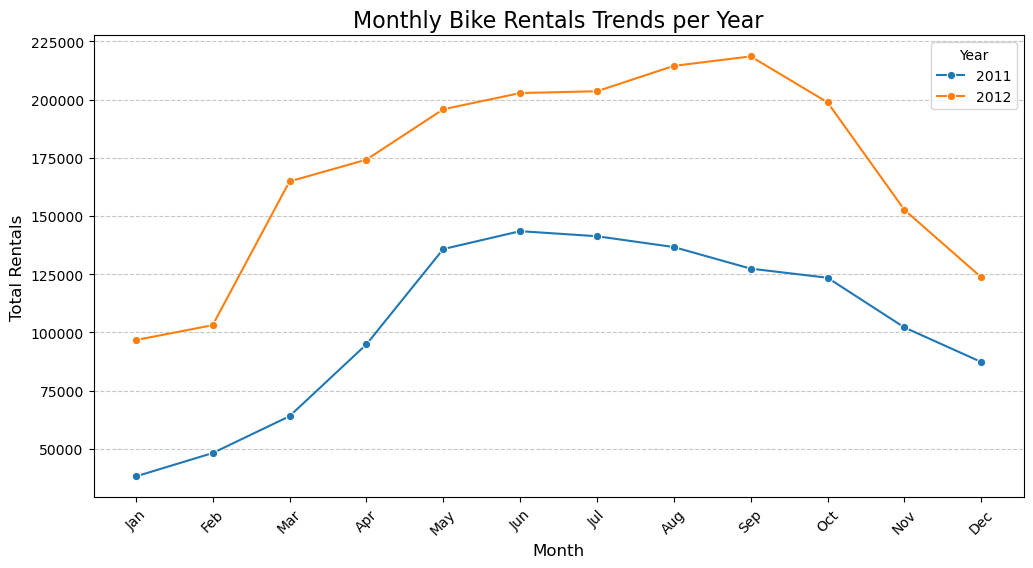

In [98]:
# Tambahkan kolom Tahun dan Bulan untuk grouping
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.strftime('%b')  # Ubah ke format nama bulan (Jan, Feb, ...)

# Kelompokkan berdasarkan Tahun dan Bulan, lalu hitung total peminjaman
monthly_trend = day_df.groupby(['year', 'month']).agg({'cnt': 'sum'}).reset_index()

# Urutkan bulan agar tidak alfabet
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)

# Plot dengan seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='month', y='cnt', hue='year', marker='o', palette="tab10")

# Tambahkan detail plot
plt.title("Monthly Bike Rentals Trends per Year", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

**Insight:**

1. **Peningkatan Penggunaan Sepeda**  
    - Terlihat peningkatan tajam dari Februari ke Maret 2012. 
    - Jumlah penyewaan sepeda di 2012 lebih tinggi dibandingkan 2011 di setiap bulan.  

2. **Tren Musiman yang Konsisten**  
    - Peningkatan dari Januari → Juni/Juli
    - Puncak pada musim panas (Juni-September) 
    - Penurunan mulai Oktober → Desember




### Pertanyaan 2: Bagaimana dampak hari libur terhadap jumlah peminjaman sepeda?

C:\Users\Pongo\AppData\Local\Temp\ipykernel_16120\266472847.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Total Rentals': [workingday_cnt[0], workingday_cnt[1], holiday_cnt[1], holiday_cnt[0]]
C:\Users\Pongo\AppData\Local\Temp\ipykernel_16120\266472847.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Type", y="Total Rentals", palette=["#a6c8ff", "#003f8a", "#cce0ff", "#002b5e"])


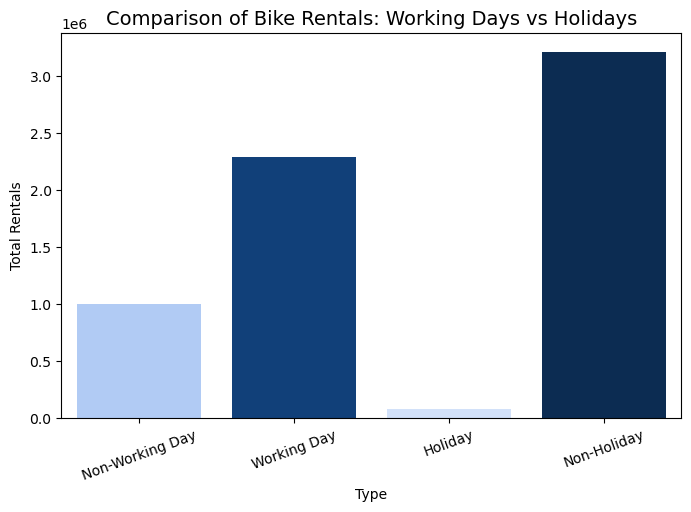

In [96]:
# Hitung total jumlah peminjaman berdasarkan workingday dan holiday
workingday_cnt = day_df.groupby(by='workingday')['cnt'].sum()
holiday_cnt = day_df.groupby(by='holiday')['cnt'].sum()

# Gabungkan dalam satu DataFrame untuk mempermudah visualisasi
comparison_df = pd.DataFrame({
    'Type': ['Non-Working Day', 'Working Day', 'Holiday', 'Non-Holiday'],
    'Total Rentals': [workingday_cnt[0], workingday_cnt[1], holiday_cnt[1], holiday_cnt[0]]
})

# Buat bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_df, x="Type", y="Total Rentals", palette=["#a6c8ff", "#003f8a", "#cce0ff", "#002b5e"])
plt.title("Comparison of Bike Rentals: Working Days vs Holidays", fontsize=14)
plt.ylabel("Total Rentals")
plt.xticks(rotation=20)
plt.show()

**Insight:**

1. **Peminjaman Lebih Banyak pada Hari Kerja**  
   - Grafik menunjukkan bahwa jumlah peminjaman sepeda pada *working days* jauh lebih tinggi dibandingkan hari libur.  
   - Ini menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan harian seperti bekerja atau sekolah.

2. **Hari Libur Tidak Berkontribusi Signifikan**  
   - Meskipun peminjaman tetap ada pada hari libur, jumlahnya jauh lebih kecil dibandingkan dengan hari kerja.  
   - Ini bisa disebabkan oleh preferensi masyarakat untuk menggunakan kendaraan lain atau aktivitas berbeda saat libur.

3. **Kategori Non-Holiday Mencatat Jumlah Tertinggi**  
   - Jika kita bandingkan antara hari libur dan non-libur, jumlah peminjaman pada **hari non-libur** jauh lebih tinggi.  
   - Hal ini mengindikasikan bahwa rutinitas harian lebih berkontribusi terhadap peningkatan penggunaan sepeda.

4. **Potensi Strategi untuk Meningkatkan Peminjaman di Hari Libur**  
   - Karena peminjaman lebih rendah di hari libur, strategi pemasaran atau promosi seperti *diskon, event bersepeda, atau jalur khusus* bisa diterapkan untuk meningkatkan penggunaan sepeda saat libur.



In [97]:
day_df.to_csv('day_df.csv', index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2